In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *
import os

In [2]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a7/1b/cbd8ae738719b5f41592a12057ef5442e2ed5f5cb5451f8fc7e9f8875a1a/kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.keras.backend.clear_session()
tf.config.optimizer.set_jit(True)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
assert tf.executing_eagerly()

NameError: name 'tf' is not defined

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
frame = pd.read_csv(r'weekcount.csv')
df = pd.DataFrame(frame)
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'
#df.drop(df[df['year'] == 2015].index, inplace = True) #remove 2015
#df.drop(df[df['year'] == 2019].index, inplace = True) #'REMOVE2020'
test = pd.DataFrame(df)
df =pd.get_dummies(df, prefix=['station' ])

#reading and dumming datta
col = list(df.columns.values)

df = df[['year', 'week', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'station_Leonard Gordon Park', 'station_Liberty Light Rail', 'station_Lincoln Park', 'station_MLK Light Rail', 'station_Manila & 1st', 'station_Marin Light Rail', 'station_McGinley Square', 'station_Monmouth and 6th', 'station_Montgomery St', 'station_Morris Canal', 'station_NJCU', 'station_Newark Ave', 'station_Newport PATH', 'station_Newport Pkwy', 'station_North St', 'station_Oakland Ave', 'station_Paulus Hook', 'station_Pershing Field', 'station_Riverview Park', 'station_Sip Ave', 'station_Union St', 'station_Van Vorst Park', 'station_Warren St', 'station_Washington St', 'station_West Side Light Rail', 'station_York St', 'anzahl']]



print(col)
print(df)

['year', 'week', 'anzahl', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'stati

In [5]:
wframe = pd.read_csv(r'weather.csv')
weather = pd.DataFrame(wframe)
weather.head()

,year,week,sunHour,totalSnow_cm,FeelsLikeC,cloudcover,humidity,precipMM,tempC,windspeedKmph
0,2015,39,10.00,0.0,18.57,37.86,66.00,0.00,21.86,13.57
1,2015,40,8.57,0.0,14.86,69.29,82.14,4.73,18.14,22.43
2,2015,41,9.31,0.0,16.29,25.00,71.57,0.71,19.57,11.71
3,2015,42,8.70,0.0,12.29,17.00,65.57,0.07,16.29,15.71
4,2015,43,7.81,0.0,12.29,27.29,68.00,0.56,16.57,16.29


In [6]:
df = pd.merge(df,weather,on=['year','week'],how='outer').dropna()
#df = df.reset_index()
print(df[df.index.duplicated()])
df = pd.DataFrame(df,columns=['year', 'week', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'station_Leonard Gordon Park', 'station_Liberty Light Rail', 'station_Lincoln Park', 'station_MLK Light Rail', 'station_Manila & 1st', 'station_Marin Light Rail', 'station_McGinley Square', 'station_Monmouth and 6th', 'station_Montgomery St', 'station_Morris Canal', 'station_NJCU', 'station_Newark Ave', 'station_Newport PATH', 'station_Newport Pkwy', 'station_North St', 'station_Oakland Ave', 'station_Paulus Hook', 'station_Pershing Field', 'station_Riverview Park', 'station_Sip Ave', 'station_Union St', 'station_Van Vorst Park', 'station_Warren St', 'station_Washington St', 'station_West Side Light Rail', 'station_York St','sunHour','totalSnow_cm','FeelsLikeC','cloudcover','humidity','precipMM','tempC','windspeedKmph', 'anzahl'])


Empty DataFrame
Columns: [year, week, station_5 Corners Library, station_Astor Place, station_Baldwin at Montgomery, station_Bayside Park, station_Bergen Ave, station_Bethune Center, station_Brunswick & 6th, station_Brunswick St, station_Central Ave, station_Christ Hospital, station_City Hall, station_Columbia Park, station_Columbus Dr at Exchange Pl, station_Columbus Drive, station_Communipaw & Berry Lane, station_Danforth Light Rail, station_Dey St, station_Dixon Mills, station_Essex Light Rail, station_Exchange Place, station_Fairmount Ave, station_Garfield Ave Station, station_Glenwood Ave, station_Grand St, station_Grove St PATH, station_Hamilton Park, station_Harborside, station_Heights Elevator, station_Hilltop, station_Hoboken Ave at Monmouth St, station_JC Medical Center, station_JCBS Depot, station_Jackson Square, station_Jersey & 3rd, station_Jersey & 6th St, station_Journal Square, station_Lafayette Park, station_Leonard Gordon Park, station_Liberty Light Rail, station_Linc

In [7]:
df.to_csv('kitrainweathe.csv',index=False)

In [8]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,73:74].values
np.set_printoptions(suppress=True)
print(x[21])
print(y[21])
print(x)
print(y)

[2015.     39.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      1.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.     10.      0.     18.57   37.86   66.      0.     21.86
   13.57]
[17.]
[[2015.     39.      1.   ...    0.     21.86   13.57]
 [2015.     39.      0.   ...    0.     21.86   13.57]
 [2015.     39.      0.   ...    0.     21.86   13.57]
 ...
 [2019.     52.      0.   ...    0.14    7.29    9.29]
 [2019.     52.      0.   ...    0.14    7.29    9.29]
 [2019.     52.      0.   ...    0.14    7.29    9.29]]
[[ 43.]
 [ 66.]
 [ 16.]
 ...
 [126.]
 [101.]
 [ 30.]]


In [9]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(-10,10))
y_scaler = MinMaxScaler(feature_range=(-10,10))
# Fit train data 
x_scaler.fit(x)
y_scaler.fit(y)
x = x_scaler.transform(x)
y = y_scaler.transform(y)

In [10]:
split_horizontally_idx = int(x.shape[0]* 0.8)
x_train = x[:split_horizontally_idx , :]
x_test = x[split_horizontally_idx: , :]
y_train = y[:split_horizontally_idx , :]
y_test = y[split_horizontally_idx: , :]
print(x_train.shape); print(y_test.shape)

(8375, 73)
(2094, 1)


In [11]:
#reshape
#x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)
print(x_train.shape)

(2094, 73)
(8375, 73)


In [12]:
with tf.device('/device:GPU:0'):
    model = keras.models.load_model('kiweatherv2min2')

OSError: SavedModel file does not exist at: kiweatherv2min2/{saved_model.pbtxt|saved_model.pb}

In [13]:

model = Sequential()
 
    
model.add(Dense(100, kernel_initializer='normal',  activation='relu', input_shape=(73,) ))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(73, kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))


In [14]:
#0.0001 Adam(learning_rate=0.0000001)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

model.compile(optimizer= Adam(learning_rate=0.0000001),loss='mse', metrics=['mae','mape'])

In [15]:
checkpoint = ModelCheckpoint('kiweatherv2min2', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [16]:
with tf.device('/device:GPU:0'):
    print(tf.device)
    model.fit(x_train, y_train, epochs=10000 , batch_size=10,shuffle=False ,callbacks=[checkpoint],validation_data=(x_test, y_test))

<function device_v2 at 0x7f3e50502160>
Epoch 1/10000
838/838 [==============================] - 13s 15ms/step - loss: 75.9873 - mae: 8.5566 - mape: 18354.6852 - val_loss: 64.7222 - val_mae: 7.8382 - val_mape: 101.2217
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 2/10000
838/838 [==============================] - 12s 15ms/step - loss: 75.7812 - mae: 8.5446 - mape: 3993.1237 - val_loss: 64.5283 - val_mae: 7.8261 - val_mape: 101.0343
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 3/10000
838/838 [==============================] - 12s 15ms/step - loss: 75.5770 - mae: 8.5329 - mape: 2762.1660 - val_loss: 64.3340 - val_mae: 7.8138 - val_mape: 100.8457
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 4/10000
838/838 [==============================] - 12s 15ms/step - loss: 75.3850 - mae: 8.5209 - mape: 1112.6699 - val_loss: 64.1392 - val_mae: 7.8016 - val_mape: 100.6568
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 5/10000
83

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 70/10000
838/838 [==============================] - 12s 15ms/step - loss: 52.8478 - mae: 7.0742 - mape: 65117.0928 - val_loss: 43.2726 - val_mae: 6.3502 - val_mape: 83.0744
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 71/10000
838/838 [==============================] - 12s 15ms/step - loss: 52.2019 - mae: 7.0311 - mape: 45052.3683 - val_loss: 42.8103 - val_mae: 6.3142 - val_mape: 82.6789
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 72/10000
838/838 [==============================] - 12s 15ms/step - loss: 51.7993 - mae: 6.9973 - mape: 90101.6948 - val_loss: 42.3474 - val_mae: 6.2780 - val_mape: 82.2827
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 73/10000
838/838 [==============================] - 12s 15ms/step - loss: 51.4085 - mae: 6.9682 - mape: 75523.1702 - val_loss: 41.8829 - val_mae: 6.2415 - val_mape: 81.8847
INFO:tensorflow:Assets written to: kiweatherv2min2/a

838/838 [==============================] - 12s 14ms/step - loss: 14.3555 - mae: 3.3409 - mape: 351135.9216 - val_loss: 10.2309 - val_mae: 2.7895 - val_mape: 49.3356
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 139/10000
838/838 [==============================] - 12s 15ms/step - loss: 14.1707 - mae: 3.2932 - mape: 469193.4380 - val_loss: 9.9037 - val_mae: 2.7285 - val_mape: 48.8889
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 140/10000
838/838 [==============================] - 12s 15ms/step - loss: 13.3803 - mae: 3.1795 - mape: 301679.6856 - val_loss: 9.5899 - val_mae: 2.6681 - val_mape: 48.4517
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 141/10000
838/838 [==============================] - 12s 15ms/step - loss: 13.1396 - mae: 3.1595 - mape: 414782.0467 - val_loss: 9.2813 - val_mae: 2.6068 - val_mape: 48.0150
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 142/10000
838/838 [==============================] - 12s 

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 173/10000
838/838 [==============================] - 12s 14ms/step - loss: 7.8897 - mae: 2.2332 - mape: 438031.4832 - val_loss: 5.8778 - val_mae: 1.6112 - val_mape: 43.4077
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 174/10000
838/838 [==============================] - 12s 15ms/step - loss: 8.2086 - mae: 2.2965 - mape: 561507.6766 - val_loss: 5.8732 - val_mae: 1.6061 - val_mape: 43.4352
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 175/10000
838/838 [==============================] - 12s 15ms/step - loss: 8.0579 - mae: 2.2647 - mape: 700721.1338 - val_loss: 5.8696 - val_mae: 1.6016 - val_mape: 43.4603
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 176/10000
838/838 [==============================] - 12s 15ms/step - loss: 7.9244 - mae: 2.2419 - mape: 428787.6192 - val_loss: 5.8670 - val_mae: 1.5981 - val_mape: 43.4807
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 208/10000
838/838 [==============================] - 12s 14ms/step - loss: 7.5025 - mae: 2.1544 - mape: 704806.7391 - val_loss: 5.8407 - val_mae: 1.5573 - val_mape: 43.7248
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 209/10000
838/838 [==============================] - 12s 14ms/step - loss: 7.5333 - mae: 2.1619 - mape: 469237.3535 - val_loss: 5.8393 - val_mae: 1.5575 - val_mape: 43.7156
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 210/10000
838/838 [==============================] - 12s 14ms/step - loss: 7.8193 - mae: 2.2291 - mape: 396105.0022 - val_loss: 5.8385 - val_mae: 1.5570 - val_mape: 43.7169
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 211/10000
838/838 [==============================] - 12s 14ms/step - loss: 7.7685 - mae: 2.2225 - mape: 461834.1742 - val_loss: 5.8384 - val_mae: 1.5560 - val_mape: 43.7257
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 277/10000
838/838 [==============================] - 12s 14ms/step - loss: 7.3727 - mae: 2.1520 - mape: 641891.1419 - val_loss: 5.7639 - val_mae: 1.5448 - val_mape: 43.4599
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 278/10000
838/838 [==============================] - 12s 14ms/step - loss: 7.3522 - mae: 2.1362 - mape: 385831.1218 - val_loss: 5.7624 - val_mae: 1.5451 - val_mape: 43.4495
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 279/10000
838/838 [==============================] - 12s 15ms/step - loss: 7.1883 - mae: 2.1119 - mape: 387083.7879 - val_loss: 5.7616 - val_mae: 1.5446 - val_mape: 43.4504
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 280/10000
838/838 [==============================] - 12s 15ms/step - loss: 7.3212 - mae: 2.1216 - mape: 589587.7685 - val_loss: 5.7608 - val_mae: 1.5441 - val_mape: 43.4515
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 312/10000
838/838 [==============================] - 173s 207ms/step - loss: 7.1673 - mae: 2.1061 - mape: 463317.1506 - val_loss: 5.7273 - val_mae: 1.5393 - val_mape: 43.3252
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 313/10000
838/838 [==============================] - 110s 131ms/step - loss: 7.0206 - mae: 2.0970 - mape: 624388.3111 - val_loss: 5.7261 - val_mae: 1.5394 - val_mape: 43.3187
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 314/10000
838/838 [==============================] - 217s 259ms/step - loss: 7.0946 - mae: 2.1024 - mape: 550393.7578 - val_loss: 5.7248 - val_mae: 1.5395 - val_mape: 43.3105
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 315/10000
838/838 [==============================] - 134s 160ms/step - loss: 6.8592 - mae: 2.0675 - mape: 363548.9486 - val_loss: 5.7241 - val_mae: 1.5391 - val_mape: 43.3103
INFO:tensorflow:Assets written to: kiweather

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 381/10000
838/838 [==============================] - 12s 15ms/step - loss: 6.5237 - mae: 2.0142 - mape: 460056.6510 - val_loss: 5.6526 - val_mae: 1.5326 - val_mape: 42.9853
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 382/10000
838/838 [==============================] - 12s 15ms/step - loss: 6.5508 - mae: 2.0289 - mape: 409172.3281 - val_loss: 5.6519 - val_mae: 1.5321 - val_mape: 42.9869
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 383/10000
838/838 [==============================] - 12s 15ms/step - loss: 6.8612 - mae: 2.0509 - mape: 297407.0043 - val_loss: 5.6501 - val_mae: 1.5328 - val_mape: 42.9689
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 384/10000
838/838 [==============================] - 12s 15ms/step - loss: 6.6886 - mae: 2.0355 - mape: 386404.8922 - val_loss: 5.6485 - val_mae: 1.5335 - val_mape: 42.9520
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 450/10000
838/838 [==============================] - 13s 15ms/step - loss: 6.3824 - mae: 2.0029 - mape: 427752.8489 - val_loss: 5.5834 - val_mae: 1.5245 - val_mape: 42.6850
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 451/10000
838/838 [==============================] - 13s 15ms/step - loss: 6.2383 - mae: 1.9578 - mape: 431613.0163 - val_loss: 5.5822 - val_mae: 1.5248 - val_mape: 42.6752
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 452/10000
838/838 [==============================] - 13s 15ms/step - loss: 6.2674 - mae: 1.9615 - mape: 515799.6757 - val_loss: 5.5812 - val_mae: 1.5247 - val_mape: 42.6705
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 453/10000
838/838 [==============================] - 13s 16ms/step - loss: 6.2670 - mae: 1.9691 - mape: 424751.4042 - val_loss: 5.5804 - val_mae: 1.5243 - val_mape: 42.6704
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 519/10000
838/838 [==============================] - 12s 14ms/step - loss: 6.2958 - mae: 1.9667 - mape: 303442.3821 - val_loss: 5.5156 - val_mae: 1.5211 - val_mape: 42.3398
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 520/10000
838/838 [==============================] - 12s 15ms/step - loss: 6.2199 - mae: 1.9578 - mape: 473640.0075 - val_loss: 5.5147 - val_mae: 1.5210 - val_mape: 42.3357
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 521/10000
838/838 [==============================] - 13s 15ms/step - loss: 6.3418 - mae: 1.9974 - mape: 445217.8824 - val_loss: 5.5139 - val_mae: 1.5202 - val_mape: 42.3406
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 522/10000
838/838 [==============================] - 12s 14ms/step - loss: 6.0020 - mae: 1.9072 - mape: 580411.5174 - val_loss: 5.5129 - val_mae: 1.5204 - val_mape: 42.3324
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 588/10000
838/838 [==============================] - 13s 15ms/step - loss: 6.1097 - mae: 1.9416 - mape: 483139.5584 - val_loss: 5.4527 - val_mae: 1.5167 - val_mape: 42.0330
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 589/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.7679 - mae: 1.8765 - mape: 542689.8969 - val_loss: 5.4517 - val_mae: 1.5161 - val_mape: 42.0348
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 590/10000
838/838 [==============================] - 12s 14ms/step - loss: 6.1243 - mae: 1.9480 - mape: 557770.7917 - val_loss: 5.4508 - val_mae: 1.5162 - val_mape: 42.0280
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 591/10000
838/838 [==============================] - 12s 14ms/step - loss: 6.0220 - mae: 1.9424 - mape: 364196.5966 - val_loss: 5.4500 - val_mae: 1.5163 - val_mape: 42.0218
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 657/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.7184 - mae: 1.8623 - mape: 529112.4472 - val_loss: 5.3948 - val_mae: 1.5135 - val_mape: 41.7329
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 658/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.8250 - mae: 1.8930 - mape: 555971.7615 - val_loss: 5.3937 - val_mae: 1.5128 - val_mape: 41.7357
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 659/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.9350 - mae: 1.8976 - mape: 526040.5872 - val_loss: 5.3933 - val_mae: 1.5139 - val_mape: 41.7208
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 660/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.6876 - mae: 1.8629 - mape: 658519.0011 - val_loss: 5.3925 - val_mae: 1.5139 - val_mape: 41.7164
INFO:tensorflow:Assets written to: kiweatherv2min2/a

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 726/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.7701 - mae: 1.8708 - mape: 493238.1629 - val_loss: 5.3398 - val_mae: 1.5106 - val_mape: 41.4597
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 727/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.5699 - mae: 1.8342 - mape: 504128.9211 - val_loss: 5.3390 - val_mae: 1.5104 - val_mape: 41.4568
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 728/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.8163 - mae: 1.8960 - mape: 503744.6588 - val_loss: 5.3384 - val_mae: 1.5106 - val_mape: 41.4512
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 729/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.6531 - mae: 1.8512 - mape: 465971.6455 - val_loss: 5.3377 - val_mae: 1.5108 - val_mape: 41.4456
INFO:tensorflow:Assets written to: kiweatherv2min2/a

Epoch 795/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.5209 - mae: 1.8363 - mape: 552527.0512 - val_loss: 5.2888 - val_mae: 1.5104 - val_mape: 41.1781
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 796/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.6439 - mae: 1.8440 - mape: 662177.7613 - val_loss: 5.2893 - val_mae: 1.5121 - val_mape: 41.1636
Epoch 797/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.4184 - mae: 1.8054 - mape: 544789.3629 - val_loss: 5.2886 - val_mae: 1.5121 - val_mape: 41.1597
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 798/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.4502 - mae: 1.8187 - mape: 490074.6065 - val_loss: 5.2873 - val_mae: 1.5113 - val_mape: 41.1603
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 799/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.3159 - mae: 1.8117 - mape: 

INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 831/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.3539 - mae: 1.7964 - mape: 564229.8512 - val_loss: 5.2642 - val_mae: 1.5112 - val_mape: 41.0323
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 832/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.3110 - mae: 1.8003 - mape: 460193.5012 - val_loss: 5.2629 - val_mae: 1.5105 - val_mape: 41.0324
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 833/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.2775 - mae: 1.7918 - mape: 620096.3776 - val_loss: 5.2625 - val_mae: 1.5109 - val_mape: 41.0264
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 834/10000
838/838 [==============================] - 12s 14ms/step - loss: 5.3353 - mae: 1.8177 - mape: 559675.0210 - val_loss: 5.2615 - val_mae: 1.5106 - val_mape: 41.0238
INFO:tensorflow:Assets written to: kiweatherv2min2/a

Epoch 902/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.4599 - mae: 1.8180 - mape: 360135.7442 - val_loss: 5.2137 - val_mae: 1.5109 - val_mape: 40.7527
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 903/10000
838/838 [==============================] - 13s 15ms/step - loss: 5.1922 - mae: 1.7871 - mape: 494480.0528 - val_loss: 5.2123 - val_mae: 1.5103 - val_mape: 40.7510
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 904/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.2432 - mae: 1.7813 - mape: 496011.3247 - val_loss: 5.2110 - val_mae: 1.5097 - val_mape: 40.7497
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 905/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.1416 - mae: 1.7713 - mape: 577926.8217 - val_loss: 5.2102 - val_mae: 1.5096 - val_mape: 40.7460
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 906/10000
838/838 [===========================

Epoch 975/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.0731 - mae: 1.7598 - mape: 334380.6175 - val_loss: 5.1604 - val_mae: 1.5102 - val_mape: 40.4643
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 976/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.1769 - mae: 1.7822 - mape: 501872.4758 - val_loss: 5.1594 - val_mae: 1.5100 - val_mape: 40.4608
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 977/10000
838/838 [==============================] - 12s 15ms/step - loss: 4.9873 - mae: 1.7235 - mape: 608349.3840 - val_loss: 5.1603 - val_mae: 1.5114 - val_mape: 40.4524
Epoch 978/10000
838/838 [==============================] - 13s 15ms/step - loss: 5.0385 - mae: 1.7549 - mape: 693962.8973 - val_loss: 5.1602 - val_mae: 1.5119 - val_mape: 40.4471
Epoch 979/10000
838/838 [==============================] - 12s 15ms/step - loss: 4.9462 - mae: 1.7338 - mape: 660730.0730 - val_loss: 5.1594 - val_mae: 1.5119 - val_map

838/838 [==============================] - 13s 15ms/step - loss: 5.1035 - mae: 1.7610 - mape: 648646.6089 - val_loss: 5.1117 - val_mae: 1.5123 - val_mape: 40.1898
Epoch 1050/10000
838/838 [==============================] - 12s 15ms/step - loss: 4.9063 - mae: 1.7230 - mape: 688353.0244 - val_loss: 5.1078 - val_mae: 1.5098 - val_mape: 40.1921
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 1051/10000
838/838 [==============================] - 12s 15ms/step - loss: 5.0575 - mae: 1.7431 - mape: 470447.3356 - val_loss: 5.1074 - val_mae: 1.5101 - val_mape: 40.1880
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 1052/10000
838/838 [==============================] - 13s 15ms/step - loss: 4.9840 - mae: 1.7445 - mape: 394621.4288 - val_loss: 5.1061 - val_mae: 1.5097 - val_mape: 40.1852
INFO:tensorflow:Assets written to: kiweatherv2min2/assets
Epoch 1053/10000
838/838 [==============================] - 14s 16ms/step - loss: 4.9173 - mae: 1.7226 - mape: 452477.5498 

KeyboardInterrupt: 

In [17]:
with tf.device('/device:GPU:0'):
    results = model.evaluate(x_test, y_test )
print("test loss, test acc:", results)

66/66 [==============================] - 0s 7ms/step - loss: 5.0646 - mae: 1.5123 - mape: 39.9544
test loss, test acc: [5.0645952224731445, 1.5122843980789185, 39.95436477661133]


In [28]:
test_data = x_test[21] 
print(test_data.shape)
test_data = np.reshape(test_data,(test_data.shape[0],))
print(test_data.shape)
with tf.device('/device:CPU:0'):
    print(y_scaler.inverse_transform(model.predict(test_data.reshape(1,73))))
print(y_scaler.inverse_transform(y_test)[21])

(73,)
(73,)
[[78.81716]]
[9.]


In [31]:
#save model
model.save('kiweatherv210')

INFO:tensorflow:Assets written to: kiweatherv210\assets


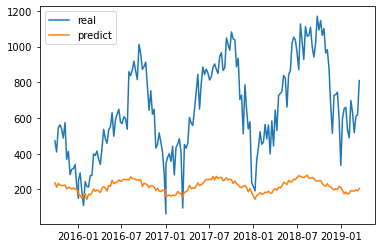

In [18]:
predict_train = model.predict(x_train)
y1 = y_scaler.inverse_transform(y_train).reshape(  y_train.shape[0])
y2 = y_scaler.inverse_transform(predict_train).reshape(  y_train.shape[0])
#test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

test1 = test.iloc[:y_train.shape[0]]
test1 = pd.DataFrame(test1)
test1['y'] = y1
test1['y2'] = y2
test1 = test1[test1['station']=='Grove St PATH']
test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
#print(test1)



plt.plot(test1['yearweek'],test1['y'],label='real'   )
plt.plot(test1['yearweek'],test1['y2'],label='predict'  )

plt.legend(loc="upper left")
plt.show()

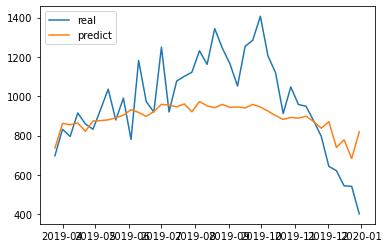

In [30]:
predict_test = model.predict(x_test)
y1 = y_scaler.inverse_transform(y_test).reshape(  y_test.shape[0])
y2 = y_scaler.inverse_transform(predict_test).reshape(  y_test.shape[0])
#test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
test2 = test.iloc[-y_test.shape[0]:]
test2 = pd.DataFrame(test2)
test2['y'] = y1
test2['y2'] = y2
test2 = test2[test2['station']=='Grove St PATH']
test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
#print(test2)


plt.plot(test2['yearweek'],test2['y'],label='real'   )
plt.plot(test2['yearweek'],test2['y2'],label='predict'  )

plt.legend(loc="upper left")
plt.show()